# Proyecto Final: Análisis de Big Data con Spark y HDFS
## Visión general:
Este proyecto está diseñado para ayudarte a adquirir experiencia práctica con Spark y HD
Trabajarás con tu propio conjunto de datos y utilizarás Spark para analizar los datos, obte
información y generar resultados en diferentes formatos de salida y fuentes. También util
Spark Structured Streaming para realizar análisis en tiempo real de los datos utilizando
## Entorno:
Ejecutarás este proyecto en tu propia computadora personal utilizando un entorno con
contenedores Docker que contienen Spark 3 y HDFS Py

## Integrantes del equipo:
* Alejandra Elizabeth Trujillo Navarro
* Carla Georgina Sanchez Arreguin
* Jessica Montserrat Morales Enrique
* Sofia Daniela Rodriguez Saenz

# 1. Proyecto: IT Salary Survey for EU region
**Dataset:** https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region
<br/>
<br/>
<div style="text-align: center;">
    <img src="images/img212.png" width="400" height="400" alt="image">
    <img src="images/img213.png" width="339" height="339" alt="image">
</div>

## 1.1 Objetivos general:
Analizar las tendencias y dinámicas laborales en el sector tecnológico a lo largo del tiempo y en función de diversos factores demográficos, económicos y empresariales, con el fin de proporcionar una visión integral de los cambios en la utilización de tecnologías, estructuras salariales, y decisiones empresariales durante y después de la pandemia de COVID-19


## 1.2 Objetivos Específicos del Proyecto

### 1.2.1. Análisis de lenguajes de programación por grupo de edad

- **Objetivo:** Determinar los lenguajes de programación más utilizados por las siguientes franjas etarias:
  - 18 a 30 años
  - 31 a 40 años
  - Mayores de 41 años

### 1.2.2. Examinación de estructuras salariales en el sector tecnológico
- **Objetivo:** Compilar un listado de salarios, ordenados de mayor a menor, especificando el puesto y la ciudad de trabajo.

### 1.2.3. Identificación de empresas con despidos durante la pandemia de COVID-19
- **Objetivo:** Listar las empresas que realizaron despidos durante la pandemia y analizar las diferencias salariales entre géneros durante este periodo.

### 1.2.4. Investigación de lenguajes de programación predominantes
- **Objetivo:** Establecer cuáles son los lenguajes de programación más utilizados en la actualidad dentro del sector tecnológico.

### 1.2.5. Estudio de diferencias en empleo y salarios por género
- **Objetivo:** Comparar las diferencia salariales en trabajadores en los diferentes géneros.

### 1.2.6. Diferencias salariales entre diferentes niveles de antigüedad
- **Objetivo:** Comparar las diferencia salariales en trabajadores con nivel senior y junior, etc.

### 1.2.7. Comparación de salarios anuales de desarrolladores de Python (2018 vs. 2020)
- **Objetivo:** Analizar cómo han evolucionado los salarios anuales de los desarrolladores de Python desde 2018 hasta 2020.

### 1.2.8. Evaluación de la evolución de los lenguajes de programación más utilizados (2018-2020)
- **Objetivo:** Identificar los cinco lenguajes de programación más populares en los años 2018, 2019 y 2020 y examinar las tendencias y cambios a lo largo de estos años.


# 2. Etapa 1: 1. Conceptos básicos estructurados de PySpark con DataFrames
En esta etapa, se concentrará en cargar los datos en HDFS y usar Spark DataFrames para realizar operaciones básicas como crear esquemas, seleccionar columnas, filtrar y ordenar filas y limpieza de valores nulos.

<div style="text-align: center;">
    <img src="images/grafica.png" width="300" height="300" alt="image">
</div>

### 1.1 Importar modulos

In [98]:
# Importamos módulos para la carga,manejo, grafica de datos
import pyspark.sql.functions as f 
import pyspark.sql.types as t
import matplotlib.pyplot as plt
from pyspark.sql.functions import desc
from pyspark.sql.functions import initcap

In [99]:
# Importamos módulos para la carga y manejo de datos
import pyspark.sql.functions as f 
import pyspark.sql.types as t

In [100]:
# Creamos sesión de Spark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("IT_Salary") \
    .getOrCreate()

## 1.2 Cargar datos

In [101]:
# Cargamos los datos de 2018
datasets_path = 'data/'
dataset2018_path=f'{datasets_path}/IT Salary Survey EU 2018.csv'
salaries2018 = spark.read.format('csv').option('header', True).load(dataset2018_path)

In [102]:
salaries2018 = salaries2018.withColumnRenamed('Years of experience', 'YearsExperience'
).withColumnRenamed('Your level', 'Level'  
).withColumnRenamed('Current Salary', 'Salary' 
).withColumnRenamed('Salary one year ago' , 'SalaryOneYear'
).withColumnRenamed('Salary two years ago', 'SalaryTwoYears'
).withColumnRenamed('Are you getting any Stock Options?', 'StockOptions'
).withColumnRenamed('Main language at work', 'MainLanguage' 
).withColumnRenamed('Company size', 'CompanySize' 
).withColumnRenamed('Company type', 'CompanyType' 
)

In [103]:
salaries2018.show(truncate=True, vertical = True)

-RECORD 0-------------------------------
 Timestamp       | 14/12/2018 12:41:33  
 Age             | 43                   
 Gender          | M                    
 City            | München              
 Position        | QA Ingenieur         
 YearsExperience | 11                   
 Level           | Senior               
 Salary          | 77000                
 SalaryOneYear   | 76200                
 SalaryTwoYears  | 68000                
 StockOptions    | No                   
 MainLanguage    | Deutsch              
 CompanySize     | 100-1000             
 CompanyType     | Product              
-RECORD 1-------------------------------
 Timestamp       | 14/12/2018 12:42:09  
 Age             | 33                   
 Gender          | F                    
 City            | München              
 Position        | Senior PHP Magent... 
 YearsExperience | 8                    
 Level           | Senior               
 Salary          | 65000                
 SalaryOneYear  

In [104]:
# Cargamos los datos de 2019
dataset2019_path=f'{datasets_path}/IT Salary Survey EU 2019.csv'
salaries2019 = spark.read.format('csv').option('header', True).load(dataset2019_path)

In [105]:
salaries2019 = salaries2019.withColumnRenamed('Zeitstempel', 'Timestamp'
).withColumnRenamed('Seniority Level', 'SeniorityLevel' 
).withColumnRenamed('Position (without seniority)' , 'Position'
).withColumnRenamed('Years of experience', 'YearsExperience '
).withColumnRenamed('Your main technology / programming language', 'ProgrammingLanguage'
).withColumnRenamed('Yearly brutto salary (without bonus and stocks)', 'Salary'
).withColumnRenamed('Yearly bonus', 'Bonus'
).withColumnRenamed('Yearly stocks','Stocks'                   
).withColumnRenamed('Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country', 'SalaryOneYear'
).withColumnRenamed('Yearly bonus one year ago. Only answer if staying in same country', 'BonusOneYear'
).withColumnRenamed('Yearly stocks one year ago. Only answer if staying in same country', 'StocksOneYear' 
).withColumnRenamed('Number of vacation days', 'VacationDays' 
).withColumnRenamed('Number of home office days per month', 'DaysHomeOffice'
).withColumnRenamed('Main language at work', 'MainLanguage'  
).withColumnRenamed('Company name ', 'CompanyName'
).withColumnRenamed('Company size', 'CompanySize' 
).withColumnRenamed('Company type', 'CompanyType'
).withColumnRenamed('Сontract duration', 'СontractDuration'
).withColumnRenamed('Company business sector', 'BusinessSector'                    
)

In [106]:
salaries2019 = salaries2019.drop('0')

In [107]:
salaries2019.show(truncate=False, vertical = True)

-RECORD 0-------------------------------------------------------------
 Timestamp           | 02.12.2019 11:18:26                            
 Age                 | 33                                             
 Gender              | Male                                           
 City                | Berlin                                         
 SeniorityLevel      | Senior                                         
 Position            | Fullstack Developer                            
 YearsExperience     | 13                                             
 ProgrammingLanguage | PHP                                            
 Salary              | 64000                                          
 Bonus               | 1000                                           
 Stocks              | NULL                                           
 SalaryOneYear       | 58000                                          
 BonusOneYear        | 1000                                           
 Stock

In [108]:
# Cargamos los datos de 2020
datasets_path = 'data/'
dataset2020_path=f'{datasets_path}/IT Salary Survey EU 2020.csv'
salaries2020 = spark.read.format('csv').option('header', True).load(dataset2020_path)

In [109]:
salaries2020 = salaries2020.withColumnRenamed('Total years of experience', 'YearsExperience'
).withColumnRenamed('Years of experience in Germany', 'ExperienceGermany' 
).withColumnRenamed('Seniority level' , 'SeniorityLevel'
).withColumnRenamed('Years of experience', 'YearsExperience '
).withColumnRenamed('Your main technology / programming language', 'ProgrammingLanguage'
).withColumnRenamed('Other technologies/programming languages you use often', 'OtherTech'
).withColumnRenamed('Yearly brutto salary (without bonus and stocks) in EUR', 'SalaryYear'
).withColumnRenamed('Yearly bonus + stocks in EUR','BonusYear'                   
).withColumnRenamed('Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', 'AnnualSalary'
).withColumnRenamed('Annual bonus+stocks one year ago. Only answer if staying in same country', 'AnnualBonus'
).withColumnRenamed('Number of vacation days', 'VacationDays'  
).withColumnRenamed('Employment status', 'EmploymentStatus'
).withColumnRenamed('Сontract duration', 'СontractDuration'  
).withColumnRenamed('Main language at work', 'MainLanguage'
).withColumnRenamed('Company size', 'CompanySize' 
).withColumnRenamed('Company type', 'CompanyType'
).withColumnRenamed('Have you lost your job due to the coronavirus outbreak?', 'LostJobCoronavirus'
).withColumnRenamed('Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 'ShorterWorkingWeek'                    
).withColumnRenamed('Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR', 'PayWorkHome'                    
)

In [110]:
salaries2020.show(truncate=False, vertical = True)

-RECORD 0-------------------------------------------------------------------------------------
 Timestamp           | 24/11/2020 11:14:15                                                    
 Age                 | 26                                                                     
 Gender              | Male                                                                   
 City                | Munich                                                                 
 Position            | Software Engineer                                                      
 YearsExperience     | 5                                                                      
 ExperienceGermany   | 3                                                                      
 SeniorityLevel      | Senior                                                                 
 ProgrammingLanguage | TypeScript                                                             
 OtherTech           | Kotlin, Javascript / Typesc

### 1.3 Crear esquemas de cada dataset

In [111]:
salaries2018.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- Level: string (nullable = true)
 |-- Salary: string (nullable = true)
 |-- SalaryOneYear: string (nullable = true)
 |-- SalaryTwoYears: string (nullable = true)
 |-- StockOptions: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)



In [112]:
salaries2019.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- YearsExperience : string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- Salary: string (nullable = true)
 |-- Bonus: string (nullable = true)
 |-- Stocks: string (nullable = true)
 |-- SalaryOneYear: string (nullable = true)
 |-- BonusOneYear: string (nullable = true)
 |-- StocksOneYear: string (nullable = true)
 |-- VacationDays: string (nullable = true)
 |-- DaysHomeOffice: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanyName: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- BusinessSector: string (nullable = true)



In [113]:
salaries2020.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- ExperienceGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- SalaryYear: string (nullable = true)
 |-- BonusYear: string (nullable = true)
 |-- AnnualSalary: string (nullable = true)
 |-- AnnualBonus: string (nullable = true)
 |-- VacationDays: string (nullable = true)
 |-- EmploymentStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (null

### 1.3 Eliminar valores nulos

In [114]:
salaries2018 = salaries2018.dropna()
salaries2018.count()

368

In [115]:
salaries2019 = salaries2019.dropna()
salaries2019.count()

31

In [116]:
salaries2020 = salaries2020.dropna()
salaries2020.count()

144

### 1.4 Salario de cada persona de acuerdo a su pocisión

In [23]:
salaries2018 = salaries2018.select('Gender','Age','City','Position','Salary')
salaries2018 = salaries2018.orderBy(desc('Salary'))
salaries2018.cache()
salaries2018.show(truncate=False)

+------+---+---------+-------------------------+------+
|Gender|Age|City     |Position                 |Salary|
+------+---+---------+-------------------------+------+
|M     |37 |München  |Project Manager          |98000 |
|F     |50 |Bayern   |Project manager          |96000 |
|M     |32 |Dublin   |.NET Developer           |96000 |
|M     |31 |Berlin   |Senior Data Scientist    |96000 |
|M     |35 |Berlin   |Head of IT               |95000 |
|M     |33 |Frankfurt|Technical Lead           |95000 |
|M     |30 |Frankfurt|Software Developer       |95000 |
|M     |32 |Berlin   |Machine Learning Engineer|95000 |
|M     |31 |Berlin   |Lead Software Engineer   |95000 |
|M     |36 |München  |Product Manager          |95000 |
|M     |33 |Berlin   |Java script              |95000 |
|M     |32 |München  |Software Developer       |94500 |
|M     |48 |Bitburg  |SSE                      |92100 |
|M     |38 |Berlin   |Senior Backend Engineer  |92000 |
|M     |33 |München  |PM                       |

### 1.5 Personas que se vieron afectadas laboralmente por el coronavirus

In [24]:
salaries2020= salaries2020.select('CompanyType', 'LostJobCoronavirus').groupBy('CompanyType','LostJobCoronavirus').count()
salaries2020.show(truncate=False)

+-------------------+-----------------------------------------------+-----+
|CompanyType        |LostJobCoronavirus                             |count|
+-------------------+-----------------------------------------------+-----+
|Startup            |No                                             |31   |
|Product            |Have been a freelancer at the beginning of year|1    |
|Publisher          |No                                             |1    |
|Telecommunications |No                                             |1    |
|Utilities          |No                                             |1    |
|Retail             |No                                             |1    |
|service            |No                                             |1    |
|Finance            |No                                             |1    |
|Concern            |Yes                                            |1    |
|IT-Outsourcing     |No                                             |1    |
|Enterprise 

 ### 1.6 Salario de personas con nivel Senior mayores a 25 años

In [25]:
salaries2019 = salaries2019.select('Age','SeniorityLevel','Position','Salary')
# Filtrar el DataFrame con las condiciones especificadas
salaries2019 = salaries2019.filter((salaries2019['Age'] > 25) & 
                                   (salaries2019['Salary'] > 90000) & 
                                   (salaries2019['SeniorityLevel'] == 'Senior'))
salaries2019 = salaries2019.orderBy(desc('Salary'))
salaries2019.show(truncate=False)

+---+--------------+------------------+------+
|Age|SeniorityLevel|Position          |Salary|
+---+--------------+------------------+------+
|34 |Senior        |Manager           |96000 |
|27 |Senior        |Data Scientist    |125000|
|49 |Senior        |Manager           |115000|
|41 |Senior        |Manager           |109000|
|38 |Senior        |Software Architect|100000|
+---+--------------+------------------+------+



# 2. Etapa 2: Análisis de datos con PySpark Estructurado
En esta etapa, utilizarás Spark DataFrames para realizar análisis de datos y obtener información.
Utilizarás agregaciones y estadísticas de dataframe para responder preguntas sobre los datos.
También puedes utilizar visualizaciones para mostrar tus resultados

<div style="text-align: center;">
    <img src="images/analysis.png" width="500" height="200" alt="image">
</div>

## 2.1. Investigación de lenguajes de programación predominantes
En esta sección, realizaremos un análisis de los lenguajes de programación más utilizados en el año 2020 en la empresas alemanas.

In [117]:
### Verificamos estructura de los salarios
salaries2020.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- ExperienceGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- SalaryYear: string (nullable = true)
 |-- BonusYear: string (nullable = true)
 |-- AnnualSalary: string (nullable = true)
 |-- AnnualBonus: string (nullable = true)
 |-- VacationDays: string (nullable = true)
 |-- EmploymentStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (null

In [118]:
# Usaremos la columna de ProgrammingLanguage
#Eliminamos aquellos registros vacios en las columnas de interes
from pyspark.sql.functions import col

# Eliminar los registros con valores nulos en las columnas de interés
salaries2020_clean = salaries2020.filter(
    col('ProgrammingLanguage').isNotNull() 
)

# Mostrar los primeros registros para verificar
salaries2020_clean.show(truncate=True, vertical=True)

-RECORD 0-----------------------------------
 Timestamp           | 24/11/2020 11:28:14  
 Age                 | 33                   
 Gender              | Male                 
 City                | Berlin               
 Position            | Data Scientist       
 YearsExperience     | 5                    
 ExperienceGermany   | 4                    
 SeniorityLevel      | Lead                 
 ProgrammingLanguage | Python               
 OtherTech           | Python, R, Google... 
 SalaryYear          | 150000               
 BonusYear           | 80000                
 AnnualSalary        | 81000                
 AnnualBonus         | 4000                 
 VacationDays        | 24                   
 EmploymentStatus    | Full-time employee   
 СontractDuration    | Unlimited contract   
 MainLanguage        | English              
 CompanySize         | 1000+                
 CompanyType         | Product              
 LostJobCoronavirus  | No                   
 ShorterWo

In [119]:
#Obtenemos los datos de lenguajes contamos la frecuencia y los ordenamos en orden descendiente
#Primero formateamos los datos minusculas para evitar repetir mismos lenguajes
language_users = salaries2020_clean.withColumn(
    "ProgrammingLanguage", 
    f.lower(f.regexp_replace(f.trim(col("ProgrammingLanguage")), r'[^\w]', ''))
)
language_users = language_users.groupBy("ProgrammingLanguage").agg(f.count("ProgrammingLanguage").alias("Users"))
language_users= language_users.orderBy(col("Users").desc())

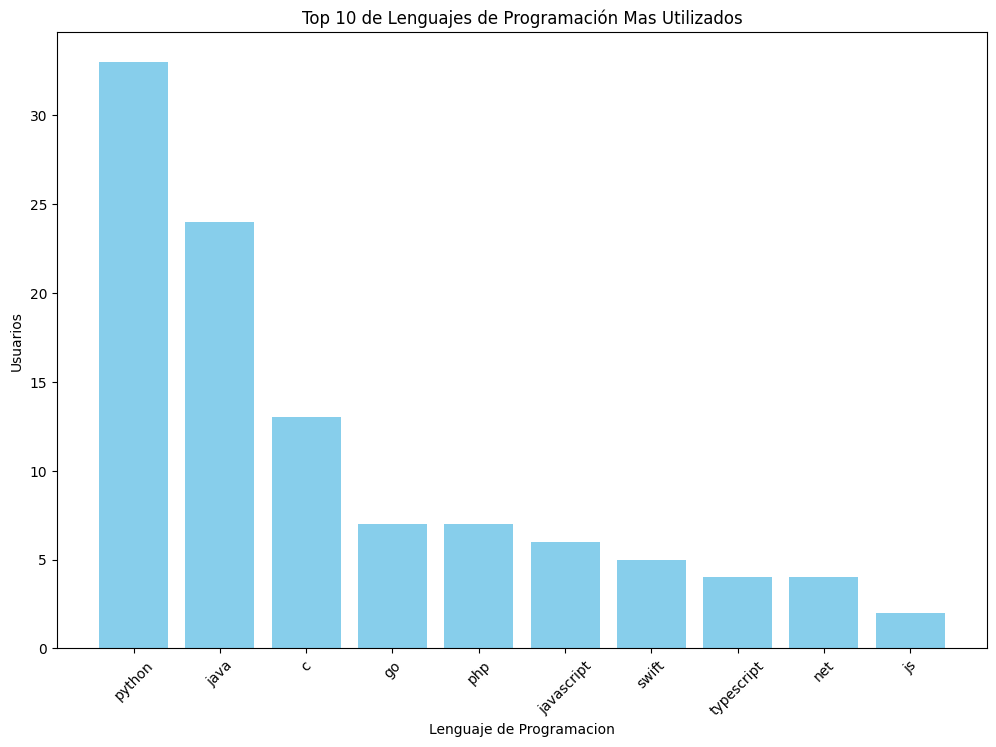

In [120]:
#Graficamos los datos
language_users_df= language_users.toPandas()

plt.figure(figsize=(12, 8))
plt.bar(language_users_df["ProgrammingLanguage"][:10], language_users_df["Users"][:10], color='skyblue')
plt.xlabel("Lenguaje de Programacion")
plt.ylabel("Usuarios")
plt.title("Top 10 de Lenguajes de Programación Mas Utilizados")
plt.xticks(rotation=45)
plt.show()

#### 2.1.1.1. Conclusiones
- Python y Java son claramente los lenguajes de programación más utilizados en los puestos de IT en Alemania en 2020. Python ocupa el primer lugar, seguido muy de cerca por Java. Esto sugiere que ambos lenguajes son escenciales para los profesionales de IT.
- También se observa el uso de lenguajes modernos como Swift, Go, Kotlin y TypeScript podria verse como una tendencia hacia la modernización y la adopción de nuevas tecnologías.

### 2.1.2. Diferencia entre promedios salariales del género masculino y femenino
En esta sección, exploraremos las diferencias en los salarios entre hombres y mujeres, enfocándonos específicamente en el nivel senior para obtener un análisis detallado de un segmento concreto. Iniciaremos con un análisis descriptivo estadístico para evaluar la forma de los datos.  Para ello, nos enfocaremos en el año mas reciente proporcionado en los datos, es decir 2020.

In [121]:
### Verificamos estructura de los salarios
salaries2020.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- ExperienceGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- SalaryYear: string (nullable = true)
 |-- BonusYear: string (nullable = true)
 |-- AnnualSalary: string (nullable = true)
 |-- AnnualBonus: string (nullable = true)
 |-- VacationDays: string (nullable = true)
 |-- EmploymentStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (null

In [122]:
#Verificamos numero de filas en el archivo
salaries2020.count()

144

In [123]:
# Usaremos las columnas de Gender para filtrar entre hombres y mujeres, YearSalary como medicion del salario y Seniority level para filtrar por experiencia
#Eliminamos aquellos registros vacios en las columnas de interes
# Eliminar los registros con valores nulos en las columnas de interés
salaries2020_clean = salaries2020.filter(
    col('Gender').isNotNull() &
    col('SalaryYear').isNotNull() &
    col('SeniorityLevel').isNotNull()
)

# Mostrar los primeros registros para verificar
salaries2020_clean.show(truncate=True, vertical=True)

-RECORD 0-----------------------------------
 Timestamp           | 24/11/2020 11:28:14  
 Age                 | 33                   
 Gender              | Male                 
 City                | Berlin               
 Position            | Data Scientist       
 YearsExperience     | 5                    
 ExperienceGermany   | 4                    
 SeniorityLevel      | Lead                 
 ProgrammingLanguage | Python               
 OtherTech           | Python, R, Google... 
 SalaryYear          | 150000               
 BonusYear           | 80000                
 AnnualSalary        | 81000                
 AnnualBonus         | 4000                 
 VacationDays        | 24                   
 EmploymentStatus    | Full-time employee   
 СontractDuration    | Unlimited contract   
 MainLanguage        | English              
 CompanySize         | 1000+                
 CompanyType         | Product              
 LostJobCoronavirus  | No                   
 ShorterWo

In [124]:
#Verificamos numero de filas en el dataframe despues de limpieza
salaries2020_clean.count()

144

In [125]:
#Exploramos los diferentes valores de Seniority level
salaries2020_clean.dropDuplicates(['SeniorityLevel']).select('SeniorityLevel').show(truncate=False, vertical = True)

-RECORD 0-----------------------------------
 SeniorityLevel | Senior                    
-RECORD 1-----------------------------------
 SeniorityLevel | Director                  
-RECORD 2-----------------------------------
 SeniorityLevel | Middle                    
-RECORD 3-----------------------------------
 SeniorityLevel | Head                      
-RECORD 4-----------------------------------
 SeniorityLevel | C-Level                   
-RECORD 5-----------------------------------
 SeniorityLevel | Lead                      
-RECORD 6-----------------------------------
 SeniorityLevel | C-level executive manager 
-RECORD 7-----------------------------------
 SeniorityLevel | Junior                    



In [126]:
#Filtramos solo los registros en nivel senior usando SQL
# Registrar el DataFrame como una vista temporal
salaries2020_clean.createOrReplaceTempView("salaries2020_clean")
salaries2020_senior = spark.sql("""
    SELECT * FROM salaries2020_clean WHERE SeniorityLevel = 'Senior'
""")
salaries2020_senior.count()

62

In [127]:
salaries2020_senior.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- ExperienceGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- SalaryYear: string (nullable = true)
 |-- BonusYear: string (nullable = true)
 |-- AnnualSalary: string (nullable = true)
 |-- AnnualBonus: string (nullable = true)
 |-- VacationDays: string (nullable = true)
 |-- EmploymentStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (null

In [129]:
#Analizamos los datos
salaries2020_senior = salaries2020_senior.withColumn("SalaryYear", col("SalaryYear").cast("double"))
stats_salaries = salaries2020_senior.select(
    f.count("SalaryYear").alias("count"),
    f.mean("SalaryYear").alias("mean"),
    f.stddev("SalaryYear").alias("stddev"),
    f.min("SalaryYear").alias("min"),
    f.max("SalaryYear").alias("max")
)
stats_salaries.show()

+-----+-----------------+------------------+-------+--------+
|count|             mean|            stddev|    min|     max|
+-----+-----------------+------------------+-------+--------+
|   62|74745.16129032258|12247.738866852447|53000.0|120000.0|
+-----+-----------------+------------------+-------+--------+




La tabla a continuación muestra un análisis descriptivo de los salarios anuales (YearSalary) para profesionales en nivel senior en Alemania. Los datos proporcionan una visión general de la distribución salarial en este segmento:

| Count |           Mean |         Stddev |    Min |     Max |
|-------|-----------------|-----------------|--------|---------|
|   62 | 74745.16129032258| 12247.738866852447 | 53000.0 | 120000.0 |

- **Count**: Representa el número total de registros de salarios en el nivel senior, que en este caso es 62.

- **Mean**: El salario promedio anual es de 74,745.167 EUR.

- **Stddev**: La desviación estándar es de 1,2247.74  EUR, lo que indica una variabilidad considerable en los salarios.

- **Min**: El salario más bajo registrado es de 53,000 EUR.

- **Max**: El salario más alto registrado es de 120,000 EUR.



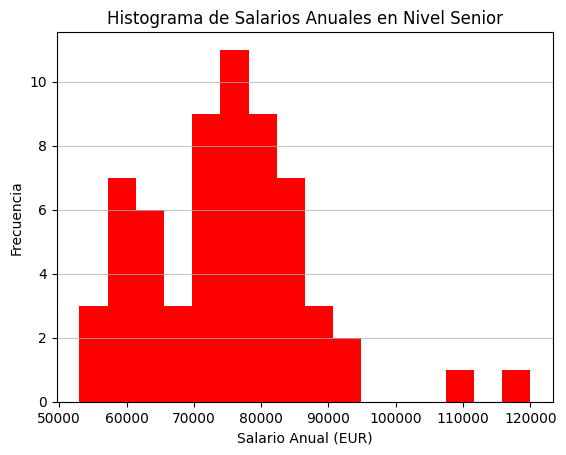

In [130]:
#Mostramos los datos en un histograma
from pyspark_dist_explore import hist

fig, ax = plt.subplots()
hist(ax, salaries2020_senior.select('SalaryYear'), bins=16, color=['red'])
plt.title("Histograma de Salarios Anuales en Nivel Senior")
plt.xlabel("Salario Anual (EUR)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)

In [131]:
#Ya que hay algunos outliers, procederemos a filtrar los datos usando como regla los cuartiles, para descartar todos los datos menores de Q1 y mayores a Q3
quartiles = salaries2020_senior.approxQuantile("SalaryYear", [0.25, 0.75], 0.01)
q1 = quartiles[0]
q3 = quartiles[1]
iqr = q3 - q1
salaries2020_senior_clean = salaries2020_senior.filter((col("SalaryYear") >= (q1 - 1.5 * iqr)) & (col("SalaryYear") <= (q3 + 1.5 * iqr)))
salaries2020_senior_clean.count()

60

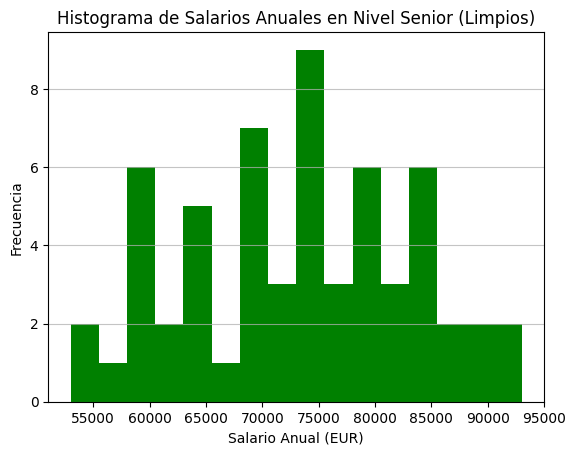

In [132]:
#Mostramos los datos en un histograma
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, salaries2020_senior_clean.select('SalaryYear'), bins=16, color=['green'])
plt.title("Histograma de Salarios Anuales en Nivel Senior (Limpios)")
plt.xlabel("Salario Anual (EUR)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)

In [133]:
#Procedemos a comparar los estadisticas entre hombres y mujeres
#Primero sacamos el analisis descriptivo entre generos
stats_gender = salaries2020_senior_clean.groupBy("Gender").agg(
    f.count("SalaryYear").alias("count"),
    f.mean("SalaryYear").alias("mean"),
    f.stddev("SalaryYear").alias("stddev"),
    f.min("SalaryYear").alias("min"),
    f.max("SalaryYear").alias("max")
)
stats_gender.show()

+------+-----+-----------------+------------------+-------+-------+
|Gender|count|             mean|            stddev|    min|    max|
+------+-----+-----------------+------------------+-------+-------+
|Female|    3|          75200.0|13458.083073008578|60000.0|85600.0|
|  Male|   57|73308.77192982456|  9800.75217051066|53000.0|93000.0|
+------+-----+-----------------+------------------+-------+-------+



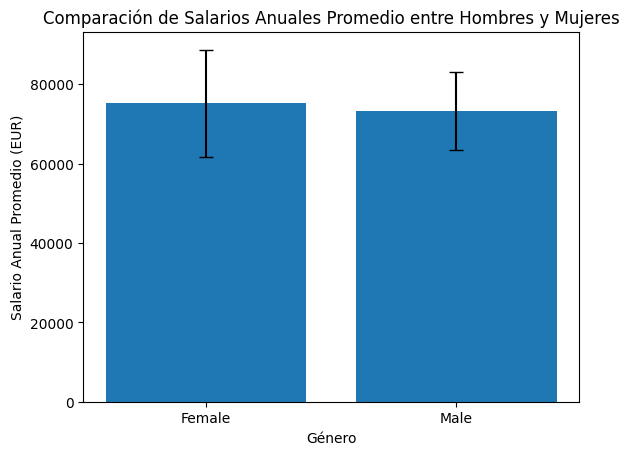

In [134]:
#Graficamos los datos
import pandas as pd
gender_data = stats_gender.select("Gender", "mean", "stddev").collect()


df = pd.DataFrame(gender_data, columns=["Gender", "mean", "stddev"])

# Plotting
plt.bar(df['Gender'], df['mean'], yerr=df['stddev'], capsize=5)
plt.xlabel("Género")
plt.ylabel("Salario Anual Promedio (EUR)")
plt.title("Comparación de Salarios Anuales Promedio entre Hombres y Mujeres")
plt.show()

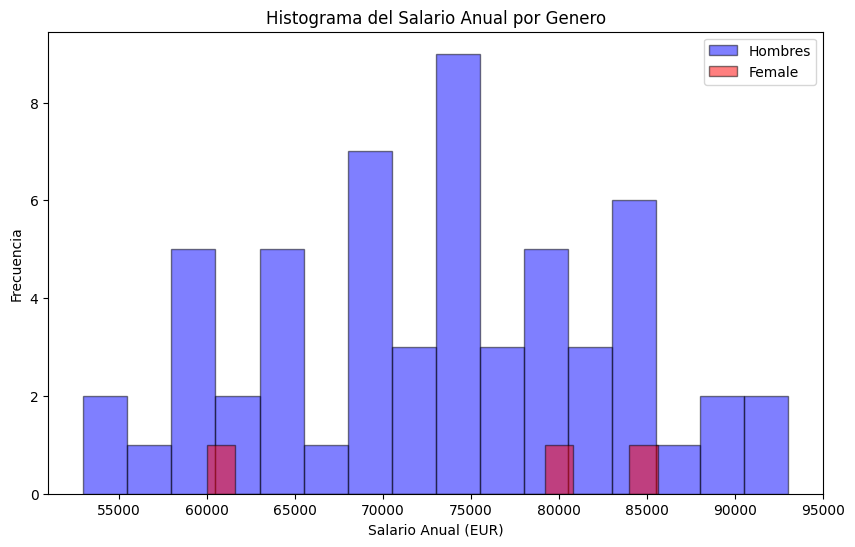

In [135]:
#Graficamos en histogramas separados
male_salaries = salaries2020_senior_clean.filter(col("Gender") == "Male").select("SalaryYear").toPandas()
female_salaries = salaries2020_senior_clean.filter(col("Gender") == "Female").select("SalaryYear").toPandas()

plt.figure(figsize=(10, 6))

plt.hist(male_salaries["SalaryYear"], bins=16, alpha=0.5, label="Hombres", color='blue', edgecolor='black')
plt.hist(female_salaries["SalaryYear"], bins=16, alpha=0.5, label="Female", color='red', edgecolor='black')

plt.title("Histograma del Salario Anual por Genero")
plt.xlabel("Salario Anual (EUR)")
plt.ylabel("Frecuencia")

plt.legend()

plt.show()

### 2.2.1. Conclusiones
- **Brecha Salarial de Género:** Los resultados muestran una brecha salarial de género en el nivel senior en Alemania, con los hombres ganando en promedio más que las mujeres. Esta diferencia puede estar influenciada por varios factores como pueden ser el rol específico, la experiencia y las habilidades adicionales.

- **Variabilidad Salarial:** La similitud en la desviación estándar entre los géneros sugiere que la dispersión de los salarios es comparable, pero la diferencia en los salarios máximos sugiere posibles desigualdades en el acceso a los puestos mejor remunerados.
- **Poca cantidad de datos**: La cantidad de registros (56 para mujeres frente a 467 para hombres) puede sugerir que las carreras relacionadas con IT no atraen tanto a las mujeres, o que hay menos mujeres en niveles senior. Sin embargo, considerando que estos datos son del 2020 y que para alcanzar el nivel senior se requieren varios años de experiencia, es probable que en la actualidad haya más mujeres en este campo. Sería valioso realizar análisis adicionales comparando los datos de diferentes años para identificar posibles tendencias de aumento en la representación femenina en niveles senior.

## 2.3. Diferencias salariales entre diferentes niveles de antigüedad
En esta sección, analizamos las diferencias salariales entre los puestos junior y senior, entre otros, dentro del sector de IT en Alemania en 2020. Esta comparación es crucial para entender cómo la experiencia y el nivel influyen en la compensación económica de los profesionales de IT.

In [136]:
#Reusamos la varible salaries2020_clean
salaries2020_clean.show(truncate=True, vertical=True)

-RECORD 0-----------------------------------
 Timestamp           | 24/11/2020 11:28:14  
 Age                 | 33                   
 Gender              | Male                 
 City                | Berlin               
 Position            | Data Scientist       
 YearsExperience     | 5                    
 ExperienceGermany   | 4                    
 SeniorityLevel      | Lead                 
 ProgrammingLanguage | Python               
 OtherTech           | Python, R, Google... 
 SalaryYear          | 150000               
 BonusYear           | 80000                
 AnnualSalary        | 81000                
 AnnualBonus         | 4000                 
 VacationDays        | 24                   
 EmploymentStatus    | Full-time employee   
 СontractDuration    | Unlimited contract   
 MainLanguage        | English              
 CompanySize         | 1000+                
 CompanyType         | Product              
 LostJobCoronavirus  | No                   
 ShorterWo

In [137]:
salaries2020_clean = salaries2020_clean.withColumn("SalaryYear", col("SalaryYear").cast("double"))

level_stats = salaries2020_clean.groupBy("SeniorityLevel").agg(
    f.count("SalaryYear").alias("count"),
    f.mean("SalaryYear").alias("mean"),
    f.stddev("SalaryYear").alias("stddev"),
    f.min("SalaryYear").alias("min"),
    f.max("SalaryYear").alias("max")
)


level_stats_clean = level_stats.filter(
    col('count').isNotNull() &
    col('mean').isNotNull() &
    col('stddev').isNotNull() &
    col('min').isNotNull() &
    col('max').isNotNull() &
    (col('SeniorityLevel') != 'Middle')
)
level_stats_clean.show()


+--------------+-----+------------------+------------------+-------+--------+
|SeniorityLevel|count|              mean|            stddev|    min|     max|
+--------------+-----+------------------+------------------+-------+--------+
|        Senior|   62| 74745.16129032258|12247.738866852447|53000.0|120000.0|
|          Head|    7|113714.28571428571| 41330.83709820182|75000.0|180000.0|
|          Lead|   29| 85498.96551724138| 25984.27743639653|25000.0|150000.0|
|        Junior|    7| 50328.57142857143|12290.472500506818|25300.0| 62000.0|
+--------------+-----+------------------+------------------+-------+--------+



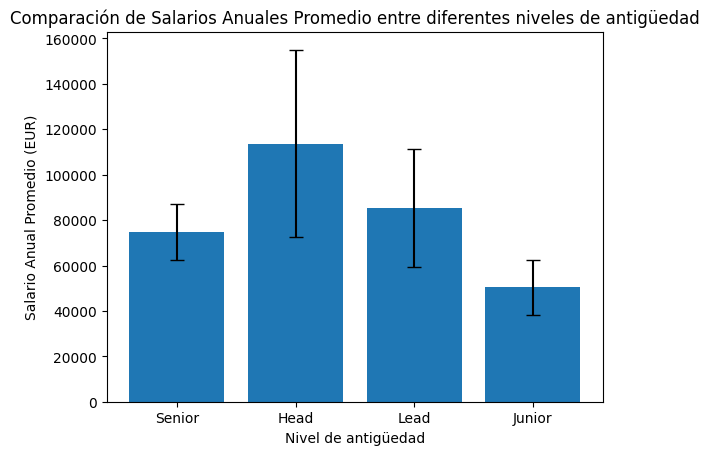

In [138]:
level_data = level_stats_clean.select("SeniorityLevel", "mean", "stddev").toPandas()

# Plotting
plt.bar(level_data['SeniorityLevel'], level_data['mean'], yerr=level_data['stddev'], capsize=5)
plt.xlabel("Nivel de antigüedad")
plt.ylabel("Salario Anual Promedio (EUR)")
plt.title("Comparación de Salarios Anuales Promedio entre diferentes niveles de antigüedad")
plt.show()

### 2.3.1. Conclusiones
- La desviación estándar (indicada por las barras de error) es considerable en todos los niveles, lo que sugiere una alta variabilidad salarial dentro de cada nivel de antigüedad.
- Los niveles "Principal" y "Head" muestran una mayor variabilidad en comparación con los otros niveles, lo que puede reflejar una gama más amplia de roles y responsabilidades dentro de estos niveles.
- Aunque el nivel "Senior" tiene un salario promedio menor en comparación con "Principal" y "Head", la variabilidad salarial en "Senior" es alta, indicando que algunos profesionales pueden ganar significativamente más o menos que el promedio.
- El nivel "Junior", con el salario promedio más bajo, también muestra una alta variabilidad, sugiriendo que hay oportunidades para que algunos profesionales en este nivel ganen salarios por encima del promedio.

### 3. Etapa 3: Joins, Tipos Complejos, Formatos de Datos de Salida y Fuentes de Datos.

En esta etapa, trabajarás con uniones (joins) de DataFrames de Spark. También puedes usar tipos de datos complejos como datetime, ubicaciones espaciales, arrays, structs o mapas si tus conjuntos de datos contienen alguno de estos y son útiles para obtener conocimientos. Experimentarás con la generación de la información resultante en diferentes formatos de salida y fuentes. Una de las fuentes de salida recomendadas es una base de datos relacional.

En este apartado trabajaremos con siguientes datos: Edad, Lenguaje de Programación, Salario Anual, Seniority Level.

### 3.1 Preparación de dataset's con los datos a utilizar.

In [80]:
### Cargamos de las columnas a trabajar del año 2018, 2019 y 2020
salaries2018_3 = spark.read.format('csv').option('header', True).load(dataset2018_path)
salaries2019_3 = spark.read.format('csv').option('header', True).load(dataset2019_path)
salaries2020_3 = spark.read.format('csv').option('header', True).load(dataset2020_path)

In [81]:
### Verificamos estructura 
salaries2018_3.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Years of experience: string (nullable = true)
 |-- Your level: string (nullable = true)
 |-- Current Salary: string (nullable = true)
 |-- Salary one year ago: string (nullable = true)
 |-- Salary two years ago: string (nullable = true)
 |-- Are you getting any Stock Options?: string (nullable = true)
 |-- Main language at work: string (nullable = true)
 |-- Company size: string (nullable = true)
 |-- Company type: string (nullable = true)



In [82]:
### Verificamos estructura 
salaries2019_3.printSchema()

root
 |-- Zeitstempel: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Seniority level: string (nullable = true)
 |-- Position (without seniority): string (nullable = true)
 |-- Years of experience: string (nullable = true)
 |-- Your main technology / programming language: string (nullable = true)
 |-- Yearly brutto salary (without bonus and stocks): string (nullable = true)
 |-- Yearly bonus: string (nullable = true)
 |-- Yearly stocks: string (nullable = true)
 |-- Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country: string (nullable = true)
 |-- Yearly bonus one year ago. Only answer if staying in same country: string (nullable = true)
 |-- Yearly stocks one year ago. Only answer if staying in same country: string (nullable = true)
 |-- Number of vacation days: string (nullable = true)
 |-- Number of home office days per month: string (nullable 

In [83]:
### Verificamos estructura 
salaries2020_3.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- Total years of experience: string (nullable = true)
 |-- Years of experience in Germany: string (nullable = true)
 |-- Seniority level: string (nullable = true)
 |-- Your main technology / programming language: string (nullable = true)
 |-- Other technologies/programming languages you use often: string (nullable = true)
 |-- Yearly brutto salary (without bonus and stocks) in EUR: string (nullable = true)
 |-- Yearly bonus + stocks in EUR: string (nullable = true)
 |-- Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country: string (nullable = true)
 |-- Annual bonus+stocks one year ago. Only answer if staying in same country: string (nullable = true)
 |-- Number of vacation days: string (nullable = true)
 |-- Employment status: string (null

In [84]:
# Renombramos la variable que indica los lenguajes de programación utilizados, unificamos el el nombre de la columna salario anual y Seniority Level.
salaries2018_3 = salaries2018_3.withColumnRenamed('Current Salary', 'Salary').withColumnRenamed('Your level', 'SeniorityLevel')

salaries2019_3 = salaries2019_3.withColumnRenamed('Your main technology / programming language', 'ProgrammingLanguage'
).withColumnRenamed('Yearly brutto salary (without bonus and stocks)', 'Salary').withColumnRenamed('Seniority level', 'SeniorityLevel')

salaries2020_3 = salaries2020_3.withColumnRenamed('Your main technology / programming language', 'ProgrammingLanguage'
).withColumnRenamed('Yearly brutto salary (without bonus and stocks) in EUR', 'Salary').withColumnRenamed('Seniority level', 'SeniorityLevel')

In [85]:
# Creamos 2 nuevos dataset que únicamente contenga las columnas "City" y "ProgrammingLanguage", para que ambos tengan la misma estructura
# y sea posible realizar un inner join.

# Seleccionar solo las columnas 'City' y 'ProgrammingLanguage'
salaries2018_3 = salaries2018_3.select('Age', 'City', 'Salary', 'SeniorityLevel')
salaries2019_3 = salaries2019_3.select('Age', 'City', 'ProgrammingLanguage', 'Salary', 'SeniorityLevel')
salaries2020_3 = salaries2020_3.select('Age', 'City', 'ProgrammingLanguage', 'Salary', 'SeniorityLevel')

In [103]:
# Eliminamos aquellos registros vacíos en las columnas de interés
# Eliminar los registros con valores nulos en las columnas de interés

salaries2018_clean_3 = salaries2018_3.filter(
    col('Age').isNotNull() &
    col('City').isNotNull() &
    col('Salary').isNotNull() &
    col('SeniorityLevel').isNotNull()
)
salaries2019_clean_3 = salaries2019_3.filter(
    col('Age').isNotNull() &
    col('City').isNotNull() &
    col('Salary').isNotNull() &
    col('SeniorityLevel').isNotNull() &
    col('ProgrammingLanguage').isNotNull()
)
salaries2020_clean_3 = salaries2020_3.filter(
    col('Age').isNotNull() &
    col('City').isNotNull() &
    col('Salary').isNotNull() &
    col('SeniorityLevel').isNotNull() &
    col('ProgrammingLanguage').isNotNull() 
)

# Mostrar los primeros registros para verificar
salaries2018_clean_3.show(truncate=True, vertical=True)
salaries2019_clean_3.show(truncate=True, vertical=True)
salaries2020_clean_3.show(truncate=True, vertical=True)

-RECORD 0-------------------
 Age            | 43        
 City           | München   
 Salary         | 77000     
 SeniorityLevel | Senior    
-RECORD 1-------------------
 Age            | 33        
 City           | München   
 Salary         | 65000     
 SeniorityLevel | Senior    
-RECORD 2-------------------
 Age            | 32        
 City           | München   
 Salary         | 88000     
 SeniorityLevel | Senior    
-RECORD 3-------------------
 Age            | 25        
 City           | München   
 Salary         | 78000     
 SeniorityLevel | Senior    
-RECORD 4-------------------
 Age            | 39        
 City           | München   
 Salary         | 69000     
 SeniorityLevel | Senior    
-RECORD 5-------------------
 Age            | 37        
 City           | München   
 Salary         | 98000     
 SeniorityLevel | Senior    
-RECORD 6-------------------
 Age            | 36        
 City           | München   
 Salary         | 109000    
 SeniorityLeve

##3.2 Promedio salarial de lenguajes de programación predominantes.


#3.2.1 Análisis de promedio salarial en conjunto en los años 2019 y 2020.

Como previamente se detectó, los dos lenguajes de programación mas utilizados en puestos de TI en Alemania en el año 2020 son Python y Java, en este apartado sumaremos al análisis el lenguaje de programación PHP ya que se encuentra en el top 5 de los años 2019 y 2020. Así que calacularemos el salario anual promedio de los tres lenguajes tomando en cuenta los dos años.


In [123]:
# Crear vistas temporales para poder ejecutar SQL sobre los DataFrames
salaries2019_3.createOrReplaceTempView("salaries2019_3")
salaries2020_3.createOrReplaceTempView("salaries2020_3")

# Consulta SQL para obtener el promedio salarial de los lenguajes Python, Java y PHP en 2019 y 2020
query = """
        SELECT ProgrammingLanguage,
               CONCAT('$', format_number(ROUND(AVG(Salary), 2), '##,###.##')) AS AverageSalary
        FROM (
            SELECT ProgrammingLanguage, NULL, Salary, NULL
            FROM salaries2019_3
            UNION ALL
            SELECT ProgrammingLanguage, NULL, NULL, Salary
            FROM salaries2020_3
        ) AS salaries
        WHERE ProgrammingLanguage IN ('Python', 'Java', 'PHP')
        GROUP BY ProgrammingLanguage
        ORDER BY AverageSalary DESC
    """

# Ejecutar la consulta SQL
result = spark.sql(query)

# Mostrar los resultados
result.show()

+-------------------+-------------+
|ProgrammingLanguage|AverageSalary|
+-------------------+-------------+
|             Python|   $74,621.57|
|               Java|   $73,744.13|
|                PHP|   $67,332.25|
+-------------------+-------------+



#3.2.1.1 Conclusión

Además de ser Python el lenguaje de programación con mayor demanda o frecuencia, también podemos concluír que es en la actualidad de los mejor pagador, considerando en promedio todos los años. Por lo tanto es una muy buena opción de para ejercer en Alemania apegándonos a la fuente de datos del presente análisis, pero podríamos aventurarnos a suponer que la situación se expande a nivel mundial.

#3.2.2 Análisis de promedio salarial individual en los años 2019 y 2020.

En este apartado calacularemos el salario anual promedio de los tres lenguajes tomando en cuenta los dos años de manera independiente.


In [119]:
# Crear vistas temporales para poder ejecutar SQL sobre los DataFrames
salaries2019_3.createOrReplaceTempView("salaries2019_3")
salaries2020_3.createOrReplaceTempView("salaries2020_3")

# Consulta SQL para obtener el promedio salarial de los lenguajes Python, Java y PHP por individual en los años 2019 y 2020
query = """
        SELECT s19.ProgrammingLanguage, 
               CONCAT('$', format_number(ROUND(AVG(s19.Salary), 2), '##,###.##')) AS AverageSalary2019,
               CONCAT('$', format_number(ROUND(AVG(s20.Salary), 2), '##,###.##')) AS AverageSalary2020
        FROM salaries2019_3 s19
        JOIN salaries2020_3 s20
        ON s19.ProgrammingLanguage = s20.ProgrammingLanguage
        WHERE s19.ProgrammingLanguage IN ('Python', 'Java', 'PHP')
        GROUP BY s19.ProgrammingLanguage
        ORDER BY AverageSalary2020 DESC, AverageSalary2019 DESC
    """

# Ejecutar la consulta SQL
result = spark.sql(query)

# Mostrar los resultados
result.show()

+-------------------+-----------------+-----------------+
|ProgrammingLanguage|AverageSalary2019|AverageSalary2020|
+-------------------+-----------------+-----------------+
|               Java|       $73,744.13|       $71,814.32|
|             Python|       $74,621.57|       $68,105.88|
|                PHP|       $67,332.25|       $64,525.02|
+-------------------+-----------------+-----------------+



#### 3.2.2.1 Conclusión

De manera similar a el ejercicio anterior, observamos que el lenguaje de programación Python fue de los mejores promedios salariales en los años 2019 y 2020, pero resalta en el análisis que el lenguaje Java en el año 2020 fue el mejor pagado según su promedio salarial anual, y aunque la muestra en este estudio pudiera considerarse relativamente pegueña, nos arroja la información de que desarrollar con Java también ese una muy buena opción laboral.

### 3.3 Promedio de edades por nivel de experiencia laboral.

#### 3.3.1 Análisis de edades por nivel de experiencia laboral en los años 2018, 2019 y 2020.

En esta sección analizaremos el promedio de edad de de los trabajadores de TI según su nivel de experiencia laboral, promediando en conjunto los años 2018, 2019 y 2020.

In [118]:
# Crear vistas temporales para poder ejecutar SQL sobre los DataFrames
salaries2018_3.createOrReplaceTempView("salaries2018_3")
salaries2019_3.createOrReplaceTempView("salaries2019_3")
salaries2020_3.createOrReplaceTempView("salaries2020_3")

# Consulta SQL el promedio de edad por Seniority Level en conjunto en los 3 años
query = """
        SELECT SeniorityLevel,
               ROUND(AVG(Age), 2) AS AvgAge
        FROM (
            SELECT SeniorityLevel, Age FROM salaries2018_3 WHERE SeniorityLevel IS NOT NULL
            UNION ALL
            SELECT SeniorityLevel, Age FROM salaries2019_3 WHERE SeniorityLevel IS NOT NULL
            UNION ALL
            SELECT SeniorityLevel, Age FROM salaries2020_3 WHERE SeniorityLevel IS NOT NULL
        ) AS all_salaries
        GROUP BY SeniorityLevel
        ORDER BY SeniorityLevel
    """

# Ejecutar la consulta SQL
result = spark.sql(query)

# Mostrar los resultados
result.show()


+--------------------+------+
|      SeniorityLevel|AvgAge|
+--------------------+------+
|             C-Level|  36.0|
|C-level executive...|  31.0|
|                 CTO|  32.0|
|            Director|  33.0|
|         Entry level|  23.0|
|                Head| 36.19|
|              Intern|  22.0|
|              Junior| 28.77|
|                 Key|  28.0|
|                Lead| 34.46|
|             Manager|  36.0|
|              Middle| 30.51|
|            No level|  32.0|
|           No level |  42.0|
|           Principal|  33.6|
|       Self employed|  45.0|
|              Senior| 33.43|
|             Student|  25.0|
|                  VP|  40.0|
| Work Center Manager|  38.0|
+--------------------+------+
only showing top 20 rows



#3.3.2 Análisis de edades por nivel de experiencia laboral por individual en los años 2018, 2019 y 2020.

En esta sección analizaremos el promedio de edad de de los trabajadores de TI según su nivel de experiencia laboral, promediando por individual años 2018, 2019 y 2020.


In [117]:
# Crear vistas temporales para poder ejecutar SQL sobre los DataFrames
salaries2018_3.createOrReplaceTempView("salaries2018_3")
salaries2019_3.createOrReplaceTempView("salaries2019_3")
salaries2020_3.createOrReplaceTempView("salaries2020_3")


# Consulta SQL el promedio de edad por Seniority Level por individual en los años 2018, 2019, 2020.
query = """
        SELECT s.SeniorityLevel,
               ROUND(AVG(s.Age), 2) AS AvgAge2018,
               ROUND(AVG(s2.Age), 2) AS AvgAge2019,
               ROUND(AVG(s3.Age), 2) AS AvgAge2020
        FROM salaries2018_3 s
        INNER JOIN salaries2019_3 s2 ON s.SeniorityLevel = s2.SeniorityLevel
        INNER JOIN salaries2020_3 s3 ON s.SeniorityLevel = s3.SeniorityLevel
        WHERE s.SeniorityLevel IS NOT NULL AND s.SeniorityLevel != 'NULL'
          AND s2.SeniorityLevel IS NOT NULL AND s2.SeniorityLevel != 'NULL'
          AND s3.SeniorityLevel IS NOT NULL AND s3.SeniorityLevel != 'NULL'
        GROUP BY s.SeniorityLevel
        ORDER BY s.SeniorityLevel
    """

# Ejecutar la consulta SQL
result = spark.sql(query)

# Mostrar los resultados
result.show()


+--------------+----------+----------+----------+
|SeniorityLevel|AvgAge2018|AvgAge2019|AvgAge2020|
+--------------+----------+----------+----------+
|        Junior|     28.67|     28.94|     28.67|
|        Middle|      30.4|     31.02|     30.21|
|        Senior|     33.12|     33.57|     33.55|
+--------------+----------+----------+----------+



#3.3.2.1 Conclusión

Observamos en los 3 niveles de experiencia mas frecuentes, como sabemos se considera a los trabajadores "Junior" con un menor nivel de experiencia, a los "Middle" con una experiencia intermedia, y a los "Senior" con una amplia experiencia. Tomando en cuenta esta referencias, podemos observar que efectivamente el promedio de edad aumenta a la par que el nivel de experiencia laboral.